In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
file_path = ('data/imdb-movies-dataset.csv')
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [6]:
# Check for missing values
df.isnull().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [7]:
# Descriptive statistics for numerical columns
df.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [9]:
# Replace infinite values with NaN
df['Rating'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
# Drop rows with NaN values in the Rating column
ratings = df['Rating'].dropna()

In [14]:
# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [30]:
# Clean the Votes column (remove commas and convert to numeric)
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [33]:
print(df['Votes'].head())

0    28744.0
1    22248.0
2    18401.0
3    38953.0
4    32517.0
Name: Votes, dtype: float64


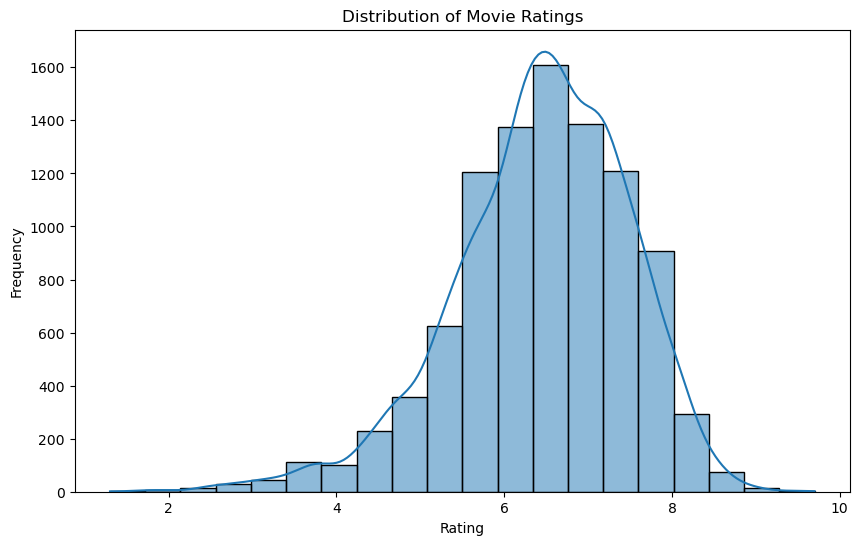

In [15]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

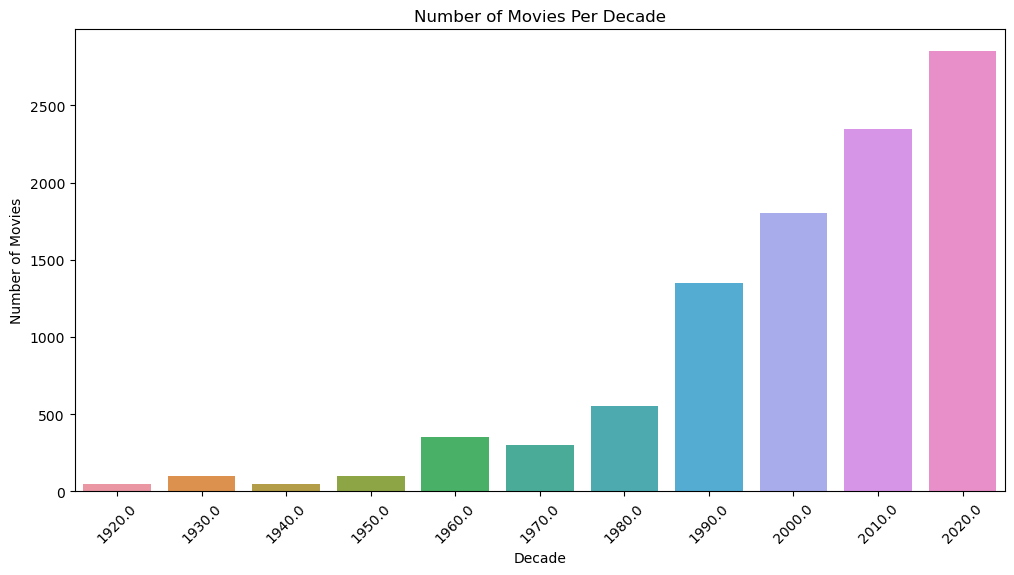

In [21]:
# Number of movies per decade
df['Decade'] = (df['Year'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.countplot(x='Decade', data=df)
plt.title('Number of Movies Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Average rating by genre
# Split genres and explode the dataframe
df_genres = df[['Genre', 'Rating']].dropna().copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')

In [19]:
# Calculate the average rating for each genre
average_ratings_by_genre = df_genres.groupby('Genre')['Rating'].mean().sort_values()

In [22]:
# Plot the average rating by genre (focusing on top 10 and bottom 10 genres for readability)
top_bottom_genres = pd.concat([average_ratings_by_genre.head(10), average_ratings_by_genre.tail(10)])

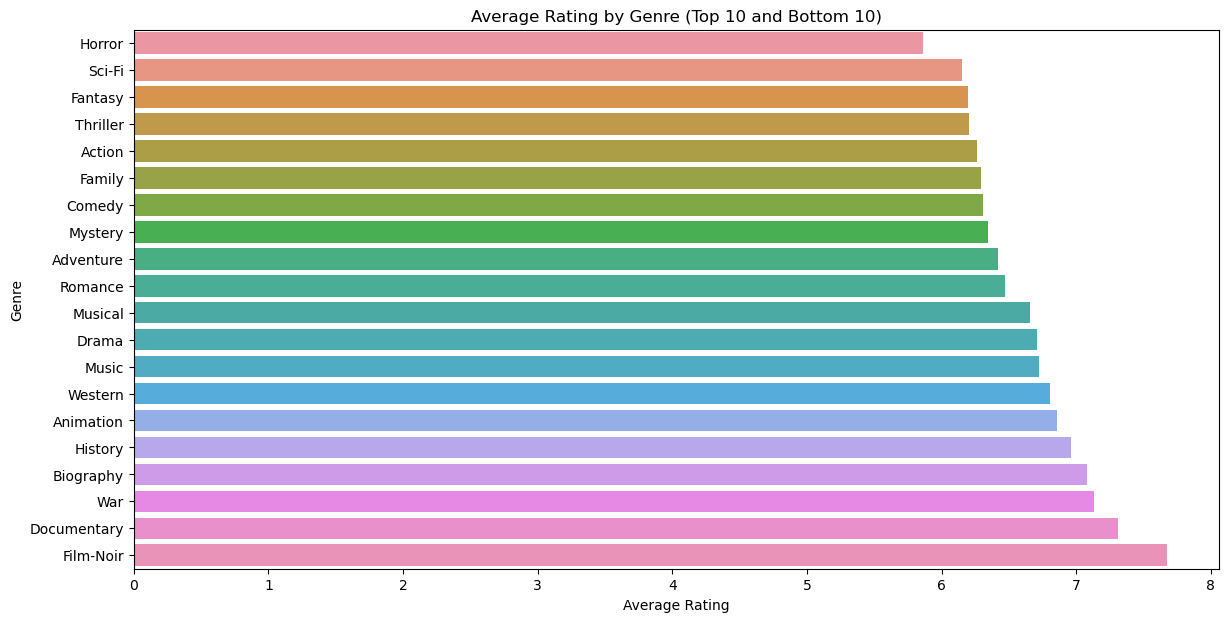

In [23]:

plt.figure(figsize=(14, 7))
sns.barplot(x=top_bottom_genres, y=top_bottom_genres.index)
plt.title('Average Rating by Genre (Top 10 and Bottom 10)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [24]:
# Top 10 Directors by Average Movie Rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

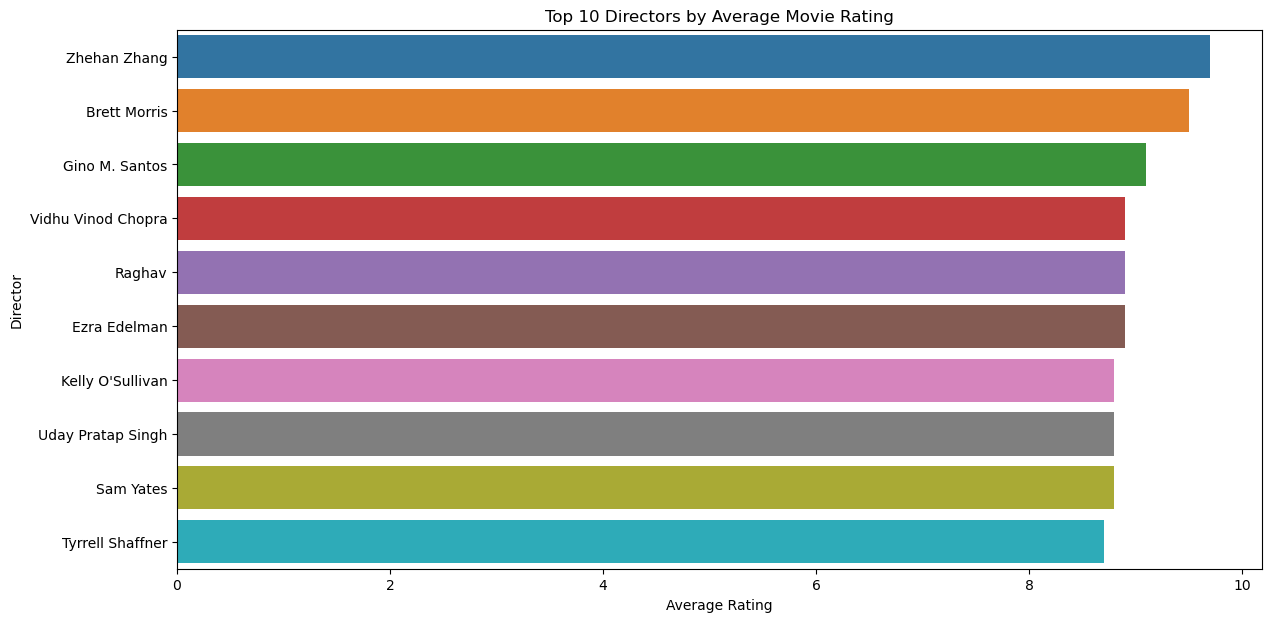

In [25]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_directors, y=top_directors.index)
plt.title('Top 10 Directors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

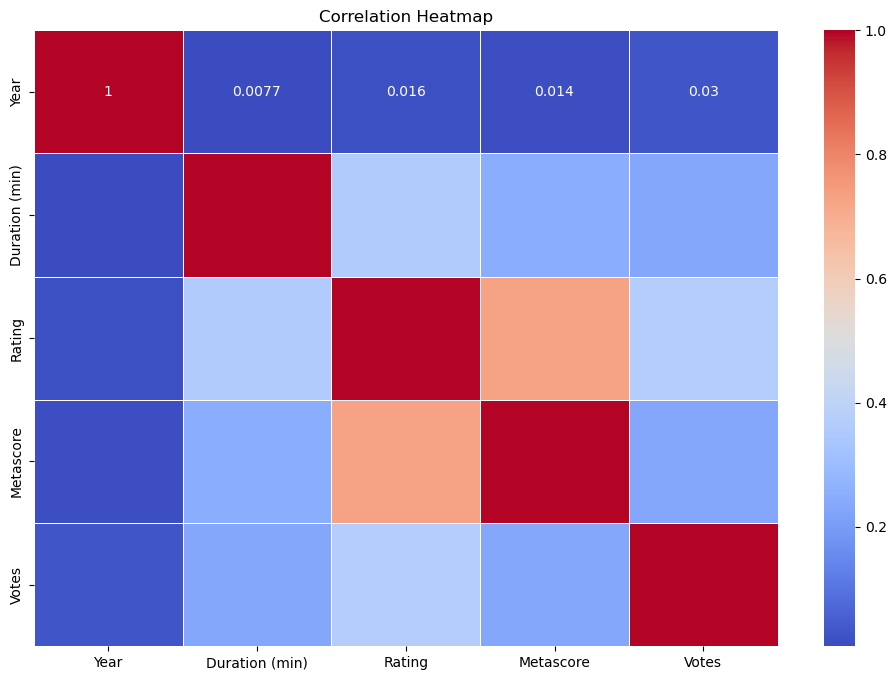

In [31]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

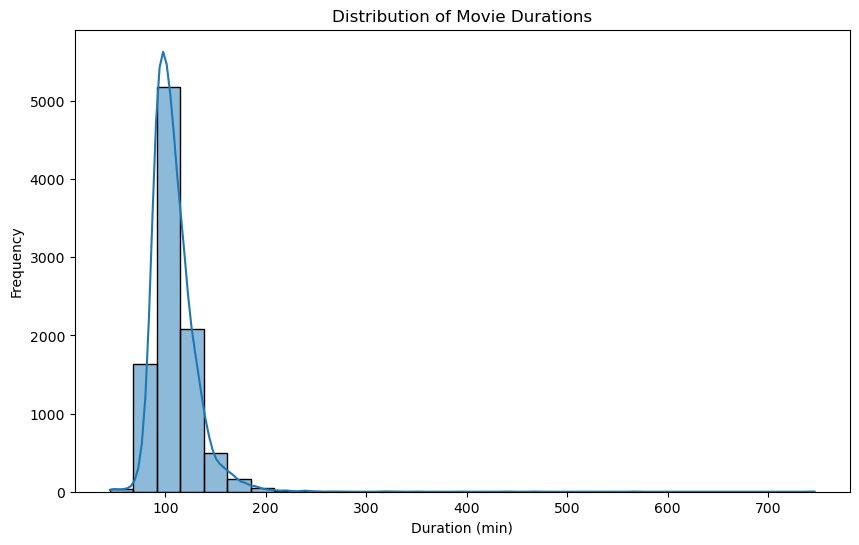

In [35]:
# Distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (min)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()